In [39]:
#Importacion de librerias#
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db
import sqlite3
import sklearn 
import datetime

In [5]:
#Importacion de base de datos .csv#
DF = pd.read_csv("DF.csv",encoding='latin-1',low_memory=False)
DF

,Unnamed: 0,Precipitacion,Campaña,Mes,Cultivo,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Produccion,Rendimiento
0,0,56.2,1987/88,enero,Ajo,BUENOS AIRES,ARRECIFES,6,77,10,10.0,35,3500.0
1,1,56.2,1987/88,enero,Ajo,BUENOS AIRES,BAHIA BLANCA,6,56,10,10.0,30,3000.0
2,2,56.2,1987/88,enero,Ajo,BUENOS AIRES,BALCARCE,6,63,258,258.0,910,3527.0
3,3,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL PUEYRREDON,6,357,3,3.0,10,3333.0
4,4,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL RODRIGUEZ,6,364,3,3.0,10,3333.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263841,263841,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRENQUE LAUQUEN,6,826,42000,40800.0,106080,2600.0
263842,263842,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRES ARROYOS,6,833,119000,119000.0,393100,3303.0
263843,263843,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,TRES LOMAS,6,847,9100,8400.0,20980,2498.0
263844,263844,NaN,2019/20,NaN,Trigo total,BUENOS AIRES,VILLARINO,6,875,15000,13200.0,10790,817.0


In [6]:
#borramos los datos NaN y columnas innecesarias
DF.dropna(inplace=True)
del DF['Unnamed: 0']
DF

,Precipitacion,Campaña,Mes,Cultivo,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Produccion,Rendimiento
0,56.2,1987/88,enero,Ajo,BUENOS AIRES,ARRECIFES,6,77,10,10.0,35,3500.0
1,56.2,1987/88,enero,Ajo,BUENOS AIRES,BAHIA BLANCA,6,56,10,10.0,30,3000.0
2,56.2,1987/88,enero,Ajo,BUENOS AIRES,BALCARCE,6,63,258,258.0,910,3527.0
3,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL PUEYRREDON,6,357,3,3.0,10,3333.0
4,56.2,1987/88,enero,Ajo,BUENOS AIRES,GENERAL RODRIGUEZ,6,364,3,3.0,10,3333.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256958,157.0,2014/15,diciembre,Trigo total,BUENOS AIRES,TRENQUE LAUQUEN,6,826,49800,49800.0,154580,3104.0
256959,157.0,2014/15,diciembre,Trigo total,BUENOS AIRES,TRES ARROYOS,6,833,129000,109040.0,393612,3610.0
256960,157.0,2014/15,diciembre,Trigo total,BUENOS AIRES,TRES LOMAS,6,847,8100,8100.0,21860,2699.0
256961,157.0,2014/15,diciembre,Trigo total,BUENOS AIRES,VILLARINO,6,875,59000,57200.0,91696,1603.0


In [8]:
#Reemplazar datos Erroneos y chequear#
valores_remplazar = {'MaÃ\xadz':'Maíz', 'LimÃ³n': 'Limon', 'CÃ¡rtamo': 'Cartamo','ManÃ\xad': 'Manzana' }
DF.replace({'Cultivo':valores_remplazar}, inplace = True)
DF['Cultivo'].unique()

array(['Ajo', 'Alpiste', 'Avena', 'Cebada cervecera', 'Cebada forrajera',
       'Cebolla total', 'Centeno', 'Girasol', 'Limon', 'Lino', 'Maíz',
       'Mandarina', 'Mijo', 'Naranja', 'Papa total', 'Pomelo',
       'Soja total', 'Sorgo', 'Trigo candeal', 'Trigo total', 'Colza',
       'Poroto seco', 'Soja 1ra', 'Soja 2da', 'Cartamo', 'Manzana'],
      dtype=object)

In [14]:
# Se filtra una region, Norte y un cultivo a estudiar, el maíz
DF_Norte= DF[DF.Departamento.isin(["SALTO", "CHACABUCO","ARENALES","ROJAS","LEANDRO N. ALEM","LINCOLN","JUNIN"])]
DF_Norte_Maíz= DF_Norte[DF_Norte.Cultivo.isin(["Maíz"])]
DF_Norte_Maíz

,Precipitacion,Campaña,Mes,Cultivo,Provincia,Departamento,idProvincia,idDepartamento,Sup_Sembrada,Sup_Cosechada,Produccion,Rendimiento
431,56.2,1987/88,enero,Maíz,BUENOS AIRES,CHACABUCO,6,210,27000,27000.0,156600,5800.0
462,56.2,1987/88,enero,Maíz,BUENOS AIRES,JUNIN,6,413,26000,26000.0,137800,5300.0
466,56.2,1987/88,enero,Maíz,BUENOS AIRES,LEANDRO N. ALEM,6,462,11000,11000.0,55000,5000.0
467,56.2,1987/88,enero,Maíz,BUENOS AIRES,LINCOLN,6,469,26600,24800.0,106640,4300.0
490,56.2,1987/88,enero,Maíz,BUENOS AIRES,ROJAS,6,686,26000,26000.0,117000,4500.0
...,...,...,...,...,...,...,...,...,...,...,...,...
256396,157.0,2014/15,diciembre,Maíz,BUENOS AIRES,JUNIN,6,413,18000,13500.0,132300,9800.0
256400,157.0,2014/15,diciembre,Maíz,BUENOS AIRES,LEANDRO N. ALEM,6,462,22000,19500.0,200850,10300.0
256401,157.0,2014/15,diciembre,Maíz,BUENOS AIRES,LINCOLN,6,469,65000,61000.0,616100,10100.0
256425,157.0,2014/15,diciembre,Maíz,BUENOS AIRES,ROJAS,6,686,18000,12500.0,135000,10800.0


In [22]:
#Se calcula el rendimiento promedio de la zona por campaña
DF_Norte_Maíz_Prom= DF_Norte_Maíz.groupby(['Campaña']).mean() 
DF_Norte_Maíz_Prom.Rendimiento

Campaña
1987/88     5016.666667
1988/89     3647.666667
1989/90     4483.333333
1990/91     5266.666667
1991/92     5800.333333
1992/93     5163.666667
1993/94     4983.333333
1994/95     5883.833333
1995/96     6201.000000
1996/97     7083.500000
1997/98     8591.333333
1998/99     8025.666667
1999/00     6700.000000
2000/01     7216.666667
2001/02     7191.666667
2002/03     8616.666667
2003/04     8733.333333
2004/05     9033.333333
2005/06     7483.333333
2006/07     9866.666667
2007/08     8766.666667
2008/09     5840.000000
2009/10    10666.666667
2010/11     8694.166667
2011/12     5866.666667
2012/13     9433.333333
2013/14     9516.666667
2014/15    10250.000000
Name: Rendimiento, dtype: float64

In [23]:
#Se calcula la precipitacion anual por campaña
DF_Norte_Maíz= DF_Norte[DF_Norte.Cultivo.isin(["Maíz"])]
DF_Norte_Maíz_Junin=DF_Norte_Maíz[DF_Norte.Departamento.isin(["JUNIN"])]
DF_Norte_Maíz_Pre= DF_Norte_Maíz_Junin.groupby(['Campaña']).sum() 
DF_Norte_Maíz_Pre.Precipitacion

C:\Users\Matias\AppData\Local\Temp\ipykernel_12088\884486611.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  DF_Norte_Maíz_Junin=DF_Norte_Maíz[DF_Norte.Departamento.isin(["JUNIN"])]


Campaña
1987/88     475.4
1988/89     915.7
1989/90    1179.8
1990/91    1205.8
1991/92     935.5
1992/93    1513.6
1993/94     922.0
1994/95     985.9
1995/96     666.9
1996/97    1102.1
1997/98    1034.3
1998/99     862.4
1999/00    1043.5
2000/01    1497.2
2001/02    1441.3
2002/03    1302.6
2003/04     801.4
2004/05     953.1
2005/06     970.6
2006/07    1253.8
2007/08     861.2
2008/09     641.4
2009/10    1491.5
2010/11     870.4
2011/12    1004.0
2012/13    1472.5
2013/14    1296.9
2014/15     624.6
Name: Precipitacion, dtype: float64

In [25]:
#Mediante la campaña se une las precipitaciones con el rendimiento promedio del maíz
Comparado= pd.merge(DF_Norte_Maíz_Prom.Rendimiento, DF_Norte_Maíz_Pre.Precipitacion, on='Campaña')
Comparado

,Rendimiento,Precipitacion
Campaña,,
1987/88,5016.666667,475.4
1988/89,3647.666667,915.7
1989/90,4483.333333,1179.8
1990/91,5266.666667,1205.8
1991/92,5800.333333,935.5
1992/93,5163.666667,1513.6
1993/94,4983.333333,922.0
1994/95,5883.833333,985.9
1995/96,6201.000000,666.9


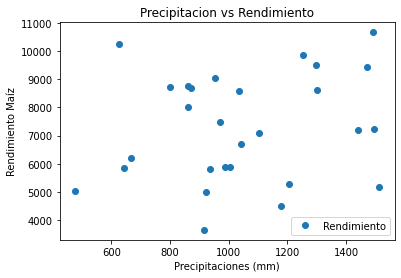

In [29]:
#Ploteamos el dataset
Comparado.plot(x='Precipitacion', y='Rendimiento', style="o")
plt.title('Precipitacion vs Rendimiento')
plt.xlabel('Precipitaciones (mm)')
plt.ylabel('Rendimiento Maíz')
plt.show()

In [30]:
#Preparacion de datos
X = Comparado.iloc[:, :-1].values
y = Comparado.iloc[:, 1].values

In [31]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
#Recuperamos la intersección
print(regressor.intercept_)

679.2033976942726


In [34]:
#La pendiente
print(regressor.coef_)

[0.04352998]


In [35]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([ 874.3628062 , 1143.52318001,  992.25650092, 1072.42421334,
        903.97770231, 1028.5605039 ])

In [41]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,1179.8,874.362806
1,1491.5,1143.523180
2,1441.3,992.256501
3,953.1,1072.424213
4,1513.6,903.977702
5,862.4,1028.560504
